In [56]:
import pandas as pd

In [58]:
df = pd.read_csv('NvidiaStock.csv')
df = df.reset_index()['close']

In [59]:
df.shape

(2369,)

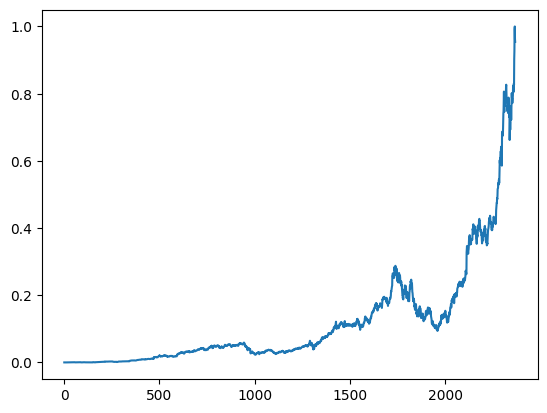

In [64]:
import matplotlib.pyplot as plt
# df
plt.plot(df)

In [62]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [63]:
df.shape

(2369, 1)

In [65]:
training_size = int(len(df)*0.65)
test_size = len(df) - training_size
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [66]:
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

#example---
# dataset = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
# time_step = 3
# dataX = [[1, 2, 3],
#          [2, 3, 4],
#          [3, 4, 5],
#          [4, 5, 6],
#          [5, 6, 7],
#          [6, 7, 8]]

# dataY = [4, 5, 6, 7, 8, 9]


In [88]:
time_step=100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [89]:
#reshaping it to 3d (which is needed for lstm)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [90]:
#creating a stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [91]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,555 (595.92 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,704 (397.29 KB)

In [92]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 348ms/step - loss: 9.0003e-04 - val_loss: 0.0022
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 5.0693e-05 - val_loss: 0.0023
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 1.8505e-05 - val_loss: 0.0028
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - loss: 1.3721e-05 - val_loss: 0.0028
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 1.3681e-05 - val_loss: 0.0030
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - loss: 1.2600e-05 - val_loss: 0.0027
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 1.1577e-05 - val_loss: 0.0027
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 1.2049e-05 - val_loss: 0.0027
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - loss: 1.1636e-05 - val_loss: 0.0025
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 1.1916e-05 - val_loss: 0.0022
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 1.0645e-05 - val_loss: 0.0

In [93]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [94]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))
# inverse scaling to get actual values and reshaping y to 2d

In [96]:
import math
from sklearn.metrics import mean_squared_error
training_MSE = math.sqrt(mean_squared_error(y_train,train_predict))

In [97]:
test_MSE = math.sqrt(mean_squared_error(y_test,test_predict))
print(training_MSE)
print(test_MSE)

0.26913800283674494
3.596472166917358


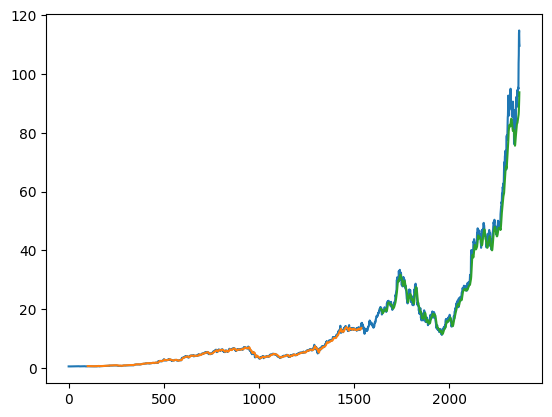

In [102]:
#plotting
#shifting train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
#shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#green color is the predicted output of test data
#orange is train predict data
#blue is the original

In [103]:
# len(test_data) = 830 so taking look back of 100 - 730
# #Now we will predict the future 30 Days
x_input = test_data[730:].reshape(1,-1)
temp_input = list(x_input)    #converting input in a list
temp_input = temp_input[0].tolist()

In [105]:
from numpy import array
out = []
n_step = 100
i=0
while i<30:
    if len(temp_input)>100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_step,1))
        y_pred = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        out.extend(y_pred.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_step,1))
        y_pred = model.predict(x_input,verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))
        out.extend(y_pred.tolist())
        i=i+1

print(out)

[0.85195476]
101
1 day input [0.47112504 0.47525285 0.47427338 0.48889561 0.4860184  0.49523597
 0.51608491 0.51751038 0.51942563 0.53244744 0.53467751 0.52955272
 0.54209356 0.54479586 0.53389043 0.54700845 0.57440766 0.60214788
 0.59244928 0.60885555 0.60485018 0.62664362 0.62764932 0.62659985
 0.64209664 0.63123488 0.63084135 0.60319735 0.58588153 0.68265757
 0.68509752 0.6875025  0.68408302 0.67500539 0.68767738 0.7153739
 0.74124264 0.74760049 0.77152776 0.80623807 0.76127824 0.74593892
 0.79962661 0.79066262 0.76491631 0.76398054 0.76938519 0.77763207
 0.78615003 0.7954463  0.82040556 0.82664097 0.80529355 0.78508308
 0.78601011 0.7860713  0.77810432 0.77383653 0.74708453 0.76547604
 0.75782386 0.74226582 0.75700178 0.78828385 0.76703265 0.74792409
 0.76029002 0.73073077 0.73629276 0.6622109  0.69122798 0.7166332
 0.69261852 0.71846105 0.76308853 0.76328096 0.75143098 0.72203786
 0.74631496 0.77230614 0.80161178 0.78774167 0.78649985 0.77193884
 0.7818298  0.78638616 0.79475546 0

In [106]:
#plotting this 30 day data
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [107]:
import matplotlib.pyplot as plt

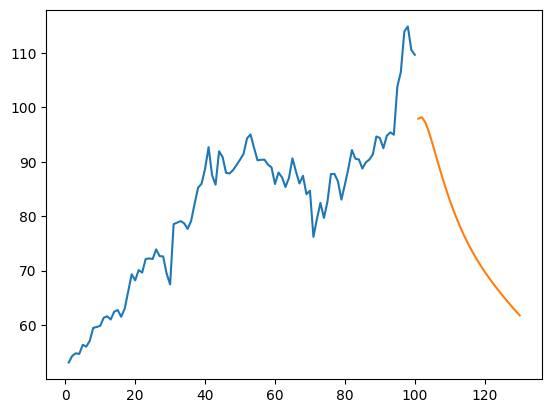

In [110]:
# len(df) = 2369
df2 = df.tolist()
df2.extend(out)
plt.plot(day_new,scaler.inverse_transform(df[2269:]))
plt.plot(day_pred,scaler.inverse_transform(out))
plt.show()

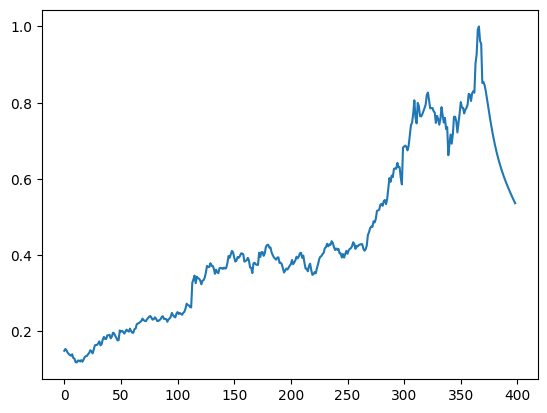

In [111]:
plt.plot(df2[2000:])

In [113]:
import pickle
with open("stock_model.sav", "wb") as model_file:
    pickle.dump(model, model_file)
with open("scaler.sav", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)